In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("teams.csv")
p = pd.read_csv("players.csv")

In [4]:
df.head()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,l4,l5,l6,l7,l8,l9,l10,l11,goals_winner,goals_loser
0,23686,26111,38835,30986,31291,31013,30935,39297,26181,30960,...,37280,24728,24664,31088,23257,24171,25922,27267,1,0
1,30660,37442,30617,24134,414792,37139,30618,40701,24800,24635,...,24408,36786,38802,24655,17866,30352,23927,24410,1,0
2,36374,30966,23818,37277,30687,36394,37169,24223,24773,34543,...,111865,25005,35327,25150,97988,41877,127857,34466,2,1
3,30622,37764,19020,23921,24136,30342,23889,23916,23922,34176,...,33086,30857,24011,109058,23268,24846,24006,24160,3,2
4,35442,24166,24167,38899,24161,24753,97932,24393,30892,35608,...,24531,40006,30895,30818,31097,23760,41157,23949,2,1


In [5]:
p.head()

,player
0,23686
1,26111
2,38835
3,30986
4,31291


In [6]:
players = {}


for i, k in enumerate(p['player']):
    players[k] = i
    
ix_players = {v:k for k,v in players.items()}

In [7]:
n_players = len(players)
n_matches = df.shape[0]

In [8]:
def vectorize_match(match_id):
    # Initialize vector
    vector = np.zeros(n_players)
    
    # Put the winners and losers
    for j in range(0,3):
        vector[players[df.iloc[match_id,j]]] = 1
        vector[players[df.iloc[match_id,j+3]]] = -1        
    return vector

In [9]:
vec = np.zeros(n_players)

In [10]:
vectorize_match(1)

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
X = np.array([vectorize_match(match_id) for match_id in range(df.shape[0])])

In [12]:
y = ((df['goals_winner']-df['goals_loser'])/df['goals_winner']).values

# Stochastic Gradient for Logistic Regression

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

# Split in validation and training data (as in RapidMiner)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [15]:
# Train the model
clf = SGDRegressor(tol=1e-3)
clf.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [16]:
# Generate predictions of the model
y_preds = clf.predict(X_test)

In [17]:
def parity_plot(y_test, y_preds):
    '''The parity plot compares the output of the ground truth agains the model. 
    The output of a perfect model would lie on the diagonal'''
    plt.scatter(y_test,y_preds)
    plt.xlim(xmin=0,xmax=1)
    plt.xlabel("Ground truth")
    plt.ylim(ymin=0,ymax=1)
    plt.ylabel("Predictions")
    plt.title("Parity plot")
    plt.show()

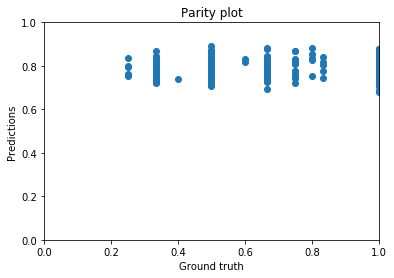

In [18]:
parity_plot(y_test,y_preds)

In [35]:
np.sum((y_test-y_preds)**2)

50.853422060543735

In [39]:
set(y_test)

{0.25,
 0.3333333333333333,
 0.4,
 0.5,
 0.6,
 0.6666666666666666,
 0.75,
 0.8,
 0.8333333333333334,
 0.8571428571428571,
 1.0}

In [38]:
y_preds[0:5]

array([0.79786978, 0.54444009, 0.5673282 , 0.94281715, 0.74545439])

In [36]:
len(y_test)

549

# Neural network (multi linear perceptron)

In [20]:
from sklearn.neural_network import MLPRegressor

In [21]:
mlp = MLPRegressor(hidden_layer_sizes=(n_players,))
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1370,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

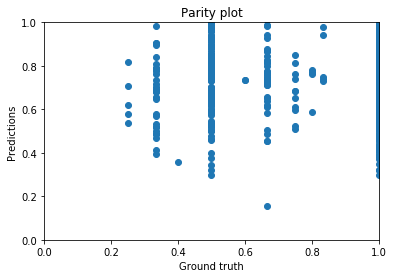

In [22]:
y_preds = mlp.predict(X_test)
parity_plot(y_test,y_preds)

In [40]:
mlp.score(X_test,y_test)

-0.3542160076157581

In [42]:
mlp.loss_curve_

[0.11373484737711677,
 0.038924344864362415,
 0.023686357025952738,
 0.017162267652315787,
 0.012921056249818774,
 0.009293772491018938,
 0.00677758935722354,
 0.005122740390061517,
 0.003925974899431513,
 0.003007346342721237,
 0.002335205115687015,
 0.001820519032905734,
 0.0014586521487306178,
 0.0011858177425179898,
 0.0009860276536653757,
 0.0008518250537800105,
 0.0007324878674288163,
 0.0006663457164526223,
 0.0006010967794722871,
 0.0005375631162710205]

In [23]:
def rank_plot(mlp):
    ranks = mlp.coefs_[1]
    players_idxs = range(n_players)
    ticks = [ix_players[ix] for ix in players_idxs]
    plt.scatter(players_idxs, ranks)
    plt.xticks(players_idxs,ticks, rotation='vertical')
    plt.show()

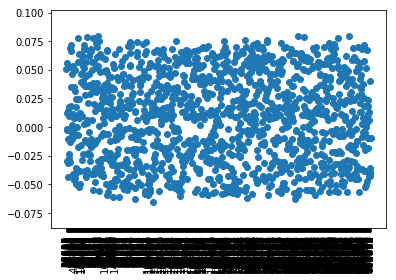

In [24]:
rank_plot(mlp)

# Adding mean and standard deviation to compute rankings

In [25]:
matches_df = pd.DataFrame(X, columns=[ix_players[ix] for ix in range(n_players)])

In [26]:
matches_df.head()

,23686,26111,38835,30986,31291,31013,30935,39297,26181,30960,...,188971,254472,611682,515338,516273,306913,680815,682552,680031,742405
0,1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
WINDOW = 2
means = matches_df.rolling(window=WINDOW, center=False).mean()
std = matches_df.rolling(window=WINDOW, center=False).std()

In [28]:
joined = means.join(std,lsuffix="_mean", rsuffix="_std")

In [29]:
joined.dropna(axis=0,inplace=True)

In [30]:
joined.head()

,23686_mean,26111_mean,38835_mean,30986_mean,31291_mean,31013_mean,30935_mean,39297_mean,26181_mean,30960_mean,...,188971_std,254472_std,611682_std,515338_std,516273_std,306913_std,680815_std,682552_std,680031_std,742405_std
1,0.5,0.5,0.5,-0.5,-0.5,-0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(joined.values, y[(WINDOW-1):])

In [32]:
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1370,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

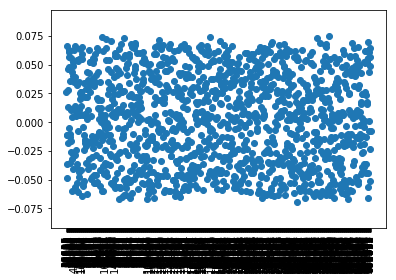

In [33]:
rank_plot(mlp)

In [34]:
mlp

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1370,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)